In [2]:
%matplotlib inline
import os
import yaml
import shutil
from tqdm import tqdm
from datetime import datetime
import random
import numpy as np
import pandas as pd
import PIL.Image as Image
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [5]:
# Load training information

HOME = os.getcwd()
DATA_LOCATION_v10 = f"{HOME}/runs/detect/v10"
DATA_LOCATION_v8 = f"{HOME}/runs/detect/v8"
DATA_LOCATION_v5 = f"{HOME}/runs/detect/v5"

results_10 = pd.read_csv(f"{DATA_LOCATION_v10}/results.csv")
results_8 = pd.read_csv(f"{DATA_LOCATION_v8}/results.csv")
results_5 = pd.read_csv(f"{DATA_LOCATION_v5}/results.csv")

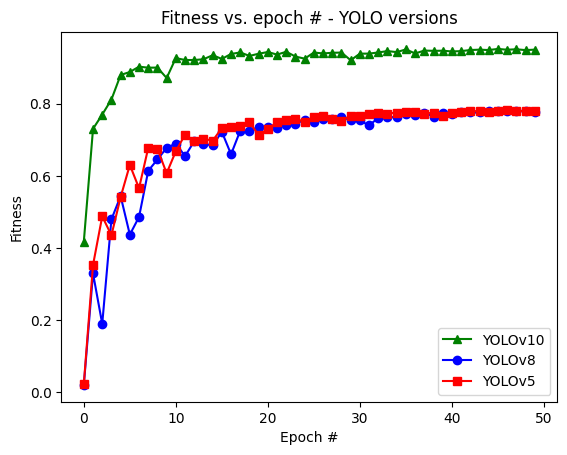

In [7]:
# Plot together fitness training data to compare

recall = results_10[results_10.axes[1][7]] 
map50 = results_10[results_10.axes[1][8]]
map5095 = results_10[results_10.axes[1][9]]
fitness_10 = 0.2 * recall + 0.2 * map50 + 0.6 * map5095
recall = results_8[results_8.axes[1][5]] 
map50 = results_8[results_8.axes[1][6]]
map5095 = results_8[results_8.axes[1][7]]
fitness_8 = 0.2 * recall + 0.2 * map50 + 0.6 * map5095
recall = results_5[results_5.axes[1][5]] 
map50 = results_5[results_5.axes[1][6]]
map5095 = results_5[results_5.axes[1][7]]
fitness_5 = 0.2 * recall + 0.2 * map50 + 0.6 * map5095
plt.plot(fitness_10, "g-^", label="YOLOv10")
plt.plot(fitness_8, "b-o", label="YOLOv8")
plt.plot(fitness_5, "r-s", label="YOLOv5")
plt.title("Fitness vs. epoch # - YOLO versions")
plt.xlabel("Epoch #")
plt.ylabel("Fitness")
plt.legend()